# Preprocessing

In [120]:
import pandas as pd
import numpy as np

In [121]:
data = pd.read_csv('../data/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


varible definitions at: https://www.kaggle.com/competitions/titanic/data

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [123]:
category_cols = ['Pclass', 'Sex', 'SibSp', 'Parch',
                'Embarked', 'Cabin']

numeric_cols = ['Age', 'Fare']

target = 'Survived'

discard_cols = ['PassengerId', 'Ticket', 'Name']

assert len(category_cols) + len(numeric_cols) + len(discard_cols) + 1 == data.shape[1]

In [124]:
print(data.count() / len(data))

PassengerId    1.000000
Survived       1.000000
Pclass         1.000000
Name           1.000000
Sex            1.000000
Age            0.801347
SibSp          1.000000
Parch          1.000000
Ticket         1.000000
Fare           1.000000
Cabin          0.228956
Embarked       0.997755
dtype: float64


In [125]:
# Cabin missing too much and is beyond repairing
if 'Cabin' in category_cols: category_cols.remove('Cabin')
discard_cols.append('Cabin')

data['Sex'].replace(to_replace='female', value=0, inplace=True)
data['Sex'].replace(to_replace='male',  value=1, inplace=True)

set(data['Embarked'])

{'C', 'Q', 'S', nan}

In [126]:
data['Embarked'].replace(to_replace='C', value=0, inplace=True)
data['Embarked'].replace(to_replace='Q',  value=1, inplace=True)
data['Embarked'].replace(to_replace='S',  value=2, inplace=True)

In [127]:
features = data.drop(columns=discard_cols + [target]).copy()
labels = data[target].copy()

In [128]:
features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2.0
1,1,0,38.0,1,0,71.2833,0.0
2,3,0,26.0,0,0,7.9250,2.0
3,1,0,35.0,1,0,53.1000,2.0
4,3,1,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2.0
887,1,0,19.0,0,0,30.0000,2.0
888,3,0,NaN,1,2,23.4500,2.0
889,1,1,26.0,0,0,30.0000,0.0


## Missing values

In [129]:
print(features.count() / len(features))

Pclass      1.000000
Sex         1.000000
Age         0.801347
SibSp       1.000000
Parch       1.000000
Fare        1.000000
Embarked    0.997755
dtype: float64


Age can be filled in by some methods

kNN is not suitable for continuous variables since K is unknown, we use 序贯热平台插补

Notice that in numpy all missing values are `np.nan`, that said, other variables might have semantically missing values, like ' ' or something else, all good here by checking the original data

In [130]:
# we can bin the Age, change it from continuous to discrete
features['Age'] = pd.cut(np.array(features['Age']), bins=5).codes
dummy_features = features.copy()
dummy_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,1,1,0,7.2500,2.0
1,1,0,2,1,0,71.2833,0.0
2,3,0,1,0,0,7.9250,2.0
3,1,0,2,1,0,53.1000,2.0
4,3,1,2,0,0,8.0500,2.0
...,...,...,...,...,...,...,...
886,2,1,1,0,0,13.0000,2.0
887,1,0,1,0,0,30.0000,2.0
888,3,0,-1,1,2,23.4500,2.0
889,1,1,1,0,0,30.0000,0.0


In [131]:
print(dummy_features.corr())
print(np.sort(dummy_features.corr()['Age']))

            Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
Pclass    1.000000  0.131900 -0.347430  0.083081  0.018443 -0.549500  0.164681
Sex       0.131900  1.000000  0.010495 -0.114631 -0.245489 -0.182333  0.110320
Age      -0.347430  0.010495  1.000000 -0.155993 -0.008735  0.146276  0.094913
SibSp     0.083081 -0.114631 -0.155993  1.000000  0.414838  0.159651  0.068900
Parch     0.018443 -0.245489 -0.008735  0.414838  1.000000  0.216225  0.040449
Fare     -0.549500 -0.182333  0.146276  0.159651  0.216225  1.000000 -0.226311
Embarked  0.164681  0.110320  0.094913  0.068900  0.040449 -0.226311  1.000000
[-0.34743004 -0.15599309 -0.00873482  0.01049486  0.09491348  0.14627624
  1.        ]


Take the `absolute value` of correlation coefficient, Pclass is has the largest correlation with Age, 

plus, Pclass is full, so we take Pclass for 序贯热平台插补

> 假设我们要填特征B，特征A与B的相关性最高，我们将A按照降序进行排列，这种顺序应用到B上，然后B取特征内的上方样本的值填补缺失

In [132]:
dummy_features.sort_values('Pclass', ascending=False, inplace=True) # the order of features changes after this

for i in range(dummy_features.shape[0]):
    if i == 0 and dummy_features['Age'][i] == -1:   # if the first row is missing, take the nearest lower valid value
        for j in range(i, dummy_features.shape[0]):
            if dummy_features['Age'][j] != -1:
                dummy_features['Age'][i] = dummy_features['Age'][j]
                break
    if dummy_features['Age'][i] == -1:      # otherwise take the nearest upper valid value
        for j in range(i, -1, -1):
            if dummy_features['Age'][j] != -1:
                dummy_features['Age'][i] = dummy_features['Age'][j]
                break
dummy_features

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_39148\890501509.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_features['Age'][i] = dummy_features['Age'][j]


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,1,1,0,7.2500,2.0
511,3,1,1,0,0,8.0500,2.0
500,3,1,1,0,0,8.6625,2.0
501,3,0,1,0,0,7.7500,1.0
502,3,0,1,0,0,7.6292,1.0
...,...,...,...,...,...,...,...
102,1,1,1,0,1,77.2875,2.0
710,1,0,1,0,0,49.5042,0.0
711,1,1,1,0,0,26.5500,2.0
712,1,1,2,1,0,52.0000,2.0


In [133]:
# change the order back
dummy_features_reset = dummy_features.reset_index()
dummy_features_reset.sort_values('index', ascending=True, inplace=True)
dummy_features_reset = dummy_features_reset.drop(columns='index')
dummy_features = dummy_features_reset.reset_index().drop(columns='index')
dummy_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,1,1,0,7.2500,2.0
1,1,0,2,1,0,71.2833,0.0
2,3,0,1,0,0,7.9250,2.0
3,1,0,2,1,0,53.1000,2.0
4,3,1,2,0,0,8.0500,2.0
...,...,...,...,...,...,...,...
886,2,1,1,0,0,13.0000,2.0
887,1,0,1,0,0,30.0000,2.0
888,3,0,1,1,2,23.4500,2.0
889,1,1,1,0,0,30.0000,0.0


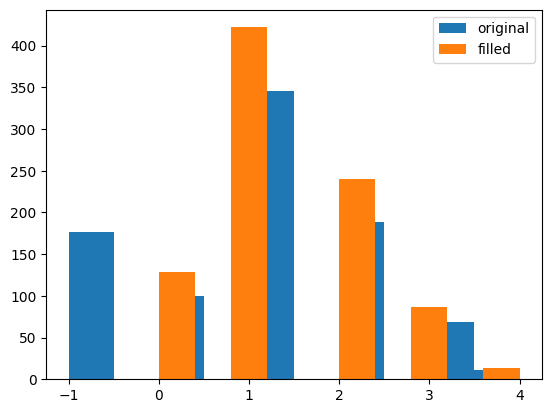

In [134]:
from matplotlib import pyplot as plt

plt.hist(features['Age'], label="original")
plt.hist(dummy_features['Age'], label="filled")
plt.legend()

And that's for *Age*, now for *Embarked*, there are 2 missing values, ~~just drop these 2 rows~~

**Caution**: dropping the rows leaves un-continuous row index in pandas, e.g. 0, 1, 3, 5, 6, 7, ..., errors might happen when using pd.concat(), which is based on row index

you can reset the row index by
```python
    dummy_features = dummy_features.reset_index().drop(columns='index')
```

but what about the labels? Delete which rows for y? It's troublesome, so just fill the missing values for *Embarked*

In [135]:
dummy_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    int8   
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    float64
dtypes: float64(2), int64(4), int8(1)
memory usage: 42.8 KB


In [136]:
dummy_features['Embarked'].fillna(dummy_features['Embarked'].mode(), inplace=True)    # fill the nan values with mode for simplicity
dummy_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    int8   
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    float64
dtypes: float64(2), int64(4), int8(1)
memory usage: 42.8 KB


<mark>Bug</mark>: did fillna() but there still exists missing values!

They can not be recognized as `np.nan` or None, it's nan if called! WTF!

```python
dummy_features['Embarked'][61], dummy_features['Embarked'][831]
```

in file: row 63 and 831

In [153]:
dummy_features['Embarked'][61]

nan

In [142]:
np.nan in dummy_features['Embarked']

False

In [138]:
dummy_features['Embarked'].astype(float)
set(dummy_features['Embarked'])

{0.0, 1.0, 2.0, nan, nan}

In [139]:
# dummy_features.to_csv('../data/X_train_preprocessed.csv', index=False)

Just go to the file and `change it manually`!

- Checkpoint

In [155]:
features = pd.read_csv("../data/X_train_preprocessed.csv")
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    int64  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


now it should be OK

## Squared-Variance-Filtering

In [156]:
print(np.std(features))     # sex should have the least variance, no features dropped here

Pclass       0.835602
Sex          0.477722
Age          0.896546
SibSp        1.102124
Parch        0.805605
Fare        49.665534
Embarked     0.791059
dtype: float64


# Feature Generating

## Binary Cross-combination

In [157]:
colNames = list(features.columns)    
colNames.remove("Fare")     # Fare is continuous, remove it

colNames_new_l = []
features_new_l = []

for col_index, col_name in enumerate(colNames):
    print(col_index, col_name)

for col_index, col_name in enumerate(colNames):
    for col_sub_index in range(col_index+1, len(colNames)):
        newNames = col_name + '&' + colNames[col_sub_index]
        print(newNames)

for col_index, col_name in enumerate(colNames):
    for col_sub_index in range(col_index+1, len(colNames)):
        newNames = col_name + '&' + colNames[col_sub_index]
        colNames_new_l.append(newNames)
        newDF = pd.Series(features[col_name].astype('str') 
                          + '&'
                          + features[colNames[col_sub_index]].astype('str'), 
                          name=col_name)
        features_new_l.append(newDF)
features_new = pd.concat(features_new_l, axis=1)
features_new.columns = colNames_new_l
features_new

0 Pclass
1 Sex
2 Age
3 SibSp
4 Parch
5 Embarked
Pclass&Sex
Pclass&Age
Pclass&SibSp
Pclass&Parch
Pclass&Embarked
Sex&Age
Sex&SibSp
Sex&Parch
Sex&Embarked
Age&SibSp
Age&Parch
Age&Embarked
SibSp&Parch
SibSp&Embarked
Parch&Embarked


,Pclass&Sex,Pclass&Age,Pclass&SibSp,Pclass&Parch,Pclass&Embarked,Sex&Age,Sex&SibSp,Sex&Parch,Sex&Embarked,Age&SibSp,Age&Parch,Age&Embarked,SibSp&Parch,SibSp&Embarked,Parch&Embarked
0,3&1,3&1,3&1,3&0,3&2.0,1&1,1&1,1&0,1&2.0,1&1,1&0,1&2.0,1&0,1&2.0,0&2.0
1,1&0,1&2,1&1,1&0,1&0.0,0&2,0&1,0&0,0&0.0,2&1,2&0,2&0.0,1&0,1&0.0,0&0.0
2,3&0,3&1,3&0,3&0,3&2.0,0&1,0&0,0&0,0&2.0,1&0,1&0,1&2.0,0&0,0&2.0,0&2.0
3,1&0,1&2,1&1,1&0,1&2.0,0&2,0&1,0&0,0&2.0,2&1,2&0,2&2.0,1&0,1&2.0,0&2.0
4,3&1,3&2,3&0,3&0,3&2.0,1&2,1&0,1&0,1&2.0,2&0,2&0,2&2.0,0&0,0&2.0,0&2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2&1,2&1,2&0,2&0,2&2.0,1&1,1&0,1&0,1&2.0,1&0,1&0,1&2.0,0&0,0&2.0,0&2.0
887,1&0,1&1,1&0,1&0,1&2.0,0&1,0&0,0&0,0&2.0,1&0,1&0,1&2.0,0&0,0&2.0,0&2.0
888,3&0,3&1,3&1,3&2,3&2.0,0&1,0&1,0&2,0&2.0,1&1,1&2,1&2.0,1&2,1&2.0,2&2.0
889,1&1,1&1,1&0,1&0,1&0.0,1&1,1&0,1&0,1&0.0,1&0,1&0,1&0.0,0&0,0&0.0,0&0.0


In [158]:
colNames_new_l

['Pclass&Sex',
 'Pclass&Age',
 'Pclass&SibSp',
 'Pclass&Parch',
 'Pclass&Embarked',
 'Sex&Age',
 'Sex&SibSp',
 'Sex&Parch',
 'Sex&Embarked',
 'Age&SibSp',
 'Age&Parch',
 'Age&Embarked',
 'SibSp&Parch',
 'SibSp&Embarked',
 'Parch&Embarked']

In [159]:
def cate_colName(Transformer, category_cols, drop='if_binary'):
    """
    离散字段独热编码后字段名创建函数
    
    :param Transformer: 独热编码转化器
    :param category_cols: 输入转化器的离散变量
    :param drop: 独热编码转化器的drop参数
    """
    
    cate_cols_new = []
    col_value = Transformer.categories_
    
    for i, j in enumerate(category_cols):
        if (drop == 'if_binary') & (len(col_value[i]) == 2):
            cate_cols_new.append(j)
        else:
            for f in col_value[i]:
                feature_name = j + '_' + f
                cate_cols_new.append(feature_name)
    return(cate_cols_new)

In [160]:
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()
enc.fit_transform(features_new)

cate_colName(enc, colNames_new_l, drop=None)
features_new_af = pd.DataFrame(enc.fit_transform(features_new).toarray(), 
                               columns = cate_colName(enc, colNames_new_l, drop=None))
features_new_af

,Pclass&Sex_1&0,Pclass&Sex_1&1,Pclass&Sex_2&0,Pclass&Sex_2&1,Pclass&Sex_3&0,Pclass&Sex_3&1,Pclass&Age_1&0,Pclass&Age_1&1,Pclass&Age_1&2,Pclass&Age_1&3,...,Parch&Embarked_1&2.0,Parch&Embarked_2&0.0,Parch&Embarked_2&1.0,Parch&Embarked_2&2.0,Parch&Embarked_3&0.0,Parch&Embarked_3&2.0,Parch&Embarked_4&2.0,Parch&Embarked_5&1.0,Parch&Embarked_5&2.0,Parch&Embarked_6&2.0
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
887,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
889,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This can be encapsulated as a function: `Binary_Cross_Combination()`

In [161]:
features_temp = pd.concat([features, features_new_af], axis=1)

### Filtering

- squared variance test

In [162]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold()
sel.fit(features_temp)

CrossComb_cols = features_temp.columns[sel.variances_ > 0.01 * 0.99]
CrossComb_cols

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Pclass&Sex_1&0', 'Pclass&Sex_1&1', 'Pclass&Sex_2&0',
       ...
       'SibSp&Embarked_2&2.0', 'SibSp&Embarked_3&2.0', 'SibSp&Embarked_4&2.0',
       'Parch&Embarked_0&0.0', 'Parch&Embarked_0&1.0', 'Parch&Embarked_0&2.0',
       'Parch&Embarked_1&0.0', 'Parch&Embarked_1&2.0', 'Parch&Embarked_2&0.0',
       'Parch&Embarked_2&2.0'],
      dtype='object', length=138)

- Chi squared test

In [163]:
features_temp

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass&Sex_1&0,Pclass&Sex_1&1,Pclass&Sex_2&0,...,Parch&Embarked_1&2.0,Parch&Embarked_2&0.0,Parch&Embarked_2&1.0,Parch&Embarked_2&2.0,Parch&Embarked_3&0.0,Parch&Embarked_3&2.0,Parch&Embarked_4&2.0,Parch&Embarked_5&1.0,Parch&Embarked_5&2.0,Parch&Embarked_6&2.0
0,3,1,1,1,0,7.2500,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,2,1,0,71.2833,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,1,0,0,7.9250,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,2,1,0,53.1000,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,1,2,0,0,8.0500,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,1,0,0,13.0000,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
887,1,0,1,0,0,30.0000,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,3,0,1,1,2,23.4500,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
889,1,1,1,0,0,30.0000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:

print(np.where(features_temp[CrossComb_cols] < 0))


(array([], dtype=int64), array([], dtype=int64))


In [165]:
from sklearn.feature_selection import chi2

chi2_p = chi2(features_temp[CrossComb_cols], labels)[1]

chi2_CrossComb_cols = []

for pValue, colname in zip(chi2_p, CrossComb_cols):
    if pValue < 0.01:
        chi2_CrossComb_cols.append(colname)

print(len(chi2_CrossComb_cols))

69


- Mutual Information

In [166]:
from sklearn.feature_selection import mutual_info_classif

MI = mutual_info_classif(features_temp[CrossComb_cols], labels, discrete_features=True, random_state=22)

MI_threshold = MI.mean() * 0.1

MI_CrossComb_cols = []

for MIvalue, colname in zip(MI, CrossComb_cols):
    if MIvalue > MI_threshold:
        MI_CrossComb_cols.append(colname)

print(len(MI_CrossComb_cols))    

89


d:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


In [167]:
set(chi2_CrossComb_cols) & set(MI_CrossComb_cols)

CrossComb_cols_select = list(set(chi2_CrossComb_cols) & set(MI_CrossComb_cols))

len(CrossComb_cols_select)

69

In [168]:
features_temp_cb = features_temp[CrossComb_cols_select]
features_temp_cb.columns

Index(['Pclass&SibSp_3&0', 'Pclass&Parch_1&2', 'Sex&SibSp_0&0',
       'Pclass&Sex_2&1', 'Sex&Embarked_0&1.0', 'Fare', 'Pclass&Sex_3&1',
       'SibSp&Embarked_0&2.0', 'Parch&Embarked_0&2.0', 'Pclass&Embarked_1&2.0',
       'Pclass&Parch_2&2', 'Sex&SibSp_0&2', 'Pclass&Sex_1&0',
       'Pclass&Parch_1&1', 'Pclass&SibSp_2&1', 'Sex&Age_1&1',
       'Pclass&SibSp_1&1', 'Pclass&Age_3&2', 'Sex&Age_0&2', 'Sex&SibSp_1&0',
       'Sex&Parch_1&0', 'Sex&Embarked_1&1.0', 'Age&Parch_1&0', 'Sex&Age_1&2',
       'SibSp&Embarked_1&2.0', 'Pclass&Embarked_3&2.0', 'Sex&Age_0&3',
       'Embarked', 'Pclass&Age_3&1', 'Pclass&Parch_1&0', 'Sex&Age_1&3',
       'Sex&Embarked_0&0.0', 'Age&SibSp_0&0', 'Age&Embarked_1&2.0',
       'SibSp&Parch_0&2', 'Pclass&Age_2&0', 'Sex&SibSp_0&1', 'Sex',
       'Sex&Parch_0&1', 'Pclass&Sex_2&0', 'Pclass&Embarked_1&0.0',
       'Sex&Age_0&0', 'Pclass&Age_1&1', 'Pclass&Age_1&2', 'Pclass',
       'Pclass&SibSp_1&0', 'Age&Embarked_1&0.0', 'Sex&Age_0&1',
       'SibSp&Parch_1&1', 

In [169]:
features_temp_cb.to_csv('../data/X_train_CrossComb.csv', index=False)

## Polynomial combination

The polynomial combination only applies to continuous variables and between seemingly meaningful variables

In [170]:
numeric_cols

['Age', 'Fare']

only 'Fare' seems to be slightly meaningful for polynomial derivation

And at least two continuous variables are required to do the polynomial derivation, this part is cancled out

## Grouping features derivation

In [171]:
from sklearn.preprocessing import OrdinalEncoder

In [172]:
features.info()
print(category_cols)
print(numeric_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    int64  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB
['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
['Age', 'Fare']


Reasonably, Grouping derivations only happen on categorical variables.

we do one-hot encoding first

In [173]:
ord_enc = OrdinalEncoder()
ord_enc.fit(features[category_cols])

# skip test(val) data for the time being
X_train_OE = pd.DataFrame(ord_enc.transform(features[category_cols]), columns=category_cols)
X_train_OE.index = features.index
X_train_OE = pd.concat([X_train_OE, features[numeric_cols]], axis=1)

In [174]:
X_train_OE

,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare
0,2.0,1.0,1.0,0.0,2.0,1,7.2500
1,0.0,0.0,1.0,0.0,0.0,2,71.2833
2,2.0,0.0,0.0,0.0,2.0,1,7.9250
3,0.0,0.0,1.0,0.0,2.0,2,53.1000
4,2.0,1.0,0.0,0.0,2.0,2,8.0500
...,...,...,...,...,...,...,...
886,1.0,1.0,0.0,0.0,2.0,1,13.0000
887,0.0,0.0,0.0,0.0,2.0,1,30.0000
888,2.0,0.0,1.0,2.0,2.0,1,23.4500
889,0.0,1.0,0.0,0.0,0.0,1,30.0000


- find **keyCols**

In [179]:
chi2_p = chi2(X_train_OE[category_cols], labels)[1]

chi2_select_cols = []

for pValue, colname in zip(chi2_p, category_cols):
    if pValue < 0.01:
        chi2_select_cols.append(colname)

print(len(chi2_select_cols))
chi2_select_cols

4


['Pclass', 'Sex', 'Parch', 'Embarked']

In [181]:
MI = mutual_info_classif(X_train_OE[category_cols], labels, discrete_features=True, random_state=22)
MI

array([0.05810725, 0.15087049, 0.02319709, 0.01636558, 0.01423325])

In [182]:
MI_select_cols = []
MI_threshold = MI.mean() * 0.1

for MIvalue, colname in zip(MI, category_cols):
    if MIvalue > MI_threshold:
        MI_select_cols.append(colname)

print(len(MI_select_cols))        
MI_select_cols

5


['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

keyCols are the intersection of the columns selected by Squared Variance and Mutual Information

Based on these columns, we will generate new features by grouping methods

In [184]:
keycol = list(set(chi2_select_cols) & set(MI_select_cols))
keycol

['Parch', 'Pclass', 'Sex', 'Embarked']

In [187]:
cat_rest = []   # categorical variables that are not keyCols

for col in category_cols:
    if col not in keycol:
        cat_rest.append(col)

cat_rest

['SibSp']